# My first Multiple Linear Regression Model

In [11]:
import pandas as pd
ad = pd.read_csv("Advertising.csv")
df = ad.copy()
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


## Simple Data Preprocessing
- Trying to understand our dataset.

In [12]:
#Delete Unnamed column
df = df.drop("Unnamed: 0", axis= 1)

In [13]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [16]:
# NULL value control.
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [17]:
#Relationship between variables.
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


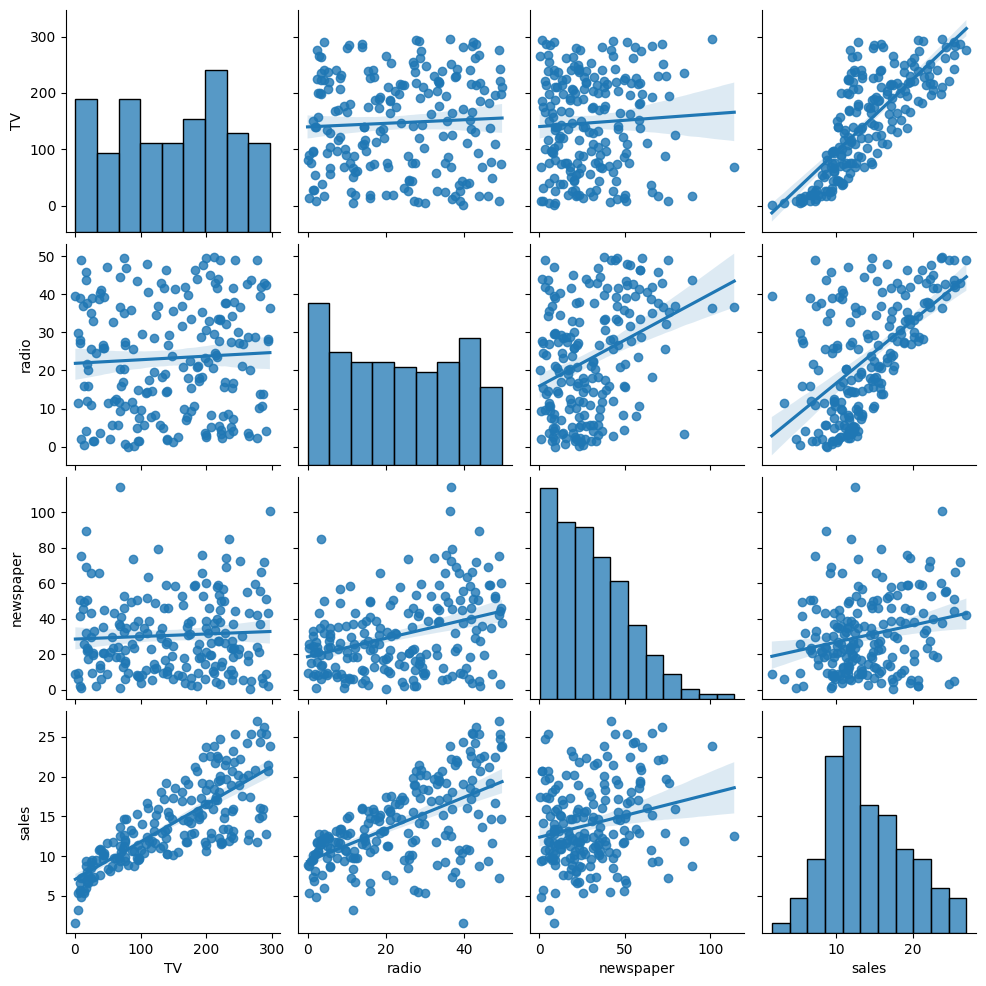

In [19]:
#Graph the relationship.
import seaborn as sns
sns.pairplot(df, kind = "reg");

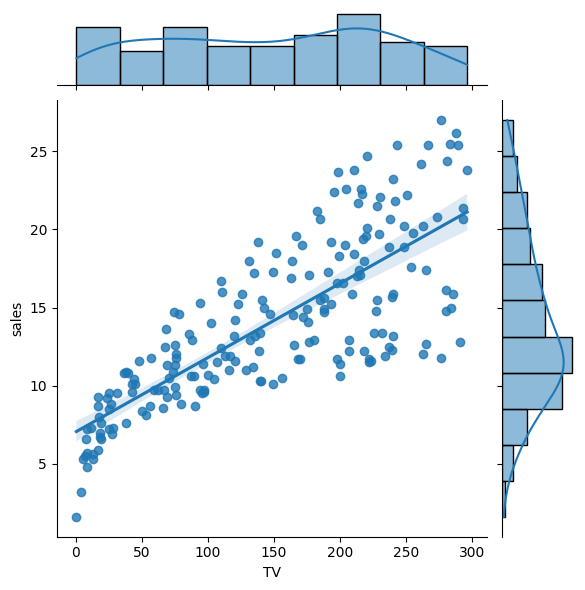

In [21]:
#sales~TV
sns.jointplot(data = df,x = "TV", y = "sales", kind = "reg");

## Create Model

In [36]:
from sklearn.model_selection import train_test_split, cross_val_score , cross_val_predict
#Ind. Variables
X = df.drop("sales", axis = 1)
#Dependent Variable.
y = df["sales"]

#Test-train:
X_train, X_test, y_train, y_test = train_test_split(X ,y , test_size = 0.20, random_state = 42)

In [37]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(160, 3)
(40, 3)
(160,)
(40,)


In [38]:
training = df.copy()
training.shape

(200, 4)

### StatsModel

In [46]:
import statsmodels.api as sm
lm = sm.OLS(y_train,X_train)
model = lm.fit()

In [47]:
#I used satsmodel for get these tables.
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  sales   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.982
Method:                 Least Squares   F-statistic:                              2935.
Date:                Fri, 04 Nov 2022   Prob (F-statistic):                   1.28e-137
Time:                        22:28:21   Log-Likelihood:                         -336.65
No. Observations:                 160   AIC:                                      679.3
Df Residuals:                     157   BIC:                                      688.5
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TV             0.0531      0.001     36.467      0.000       0.050       0.056
radio          0.2188      0.011     20.138      0.000       0.197       0.240
newspaper      0.0239      0.008      3.011      0.003       0.008       0.040
==============================================================================
Omnibus:                       11.405   Durbin-Watson:                   1.895
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               15.574
Skew:                          -0.432   Prob(JB):                     0.000415
Kurtosis:                       4.261   Cond. No.                         13.5
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Model with Scikit-Learn

In [48]:
lm = LinearRegression()
model = lm.fit(X_train,y_train)

In [49]:
#Constant
model.intercept_

2.979067338122629

In [50]:
#Coefficients of the independent variables.
model.coef_

array([0.04472952, 0.18919505, 0.00276111])

#### Predict


**Sales = 2.9791 + TV*0.0447 + radio*0.1892 + newspaper*0.00276**
- TV = 240, radio = 95, newspaper = 300 what would be the salary ? 


In [53]:
values = [[240],[95],[300]]
values = pd.DataFrame(values).T
values

,0,1,2
0,240,95,300


In [54]:
model.predict(values)

C:\Users\umutk\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([32.51601599])

In [60]:
# RMSE for train
import numpy as np
from sklearn.metrics import mean_squared_error 
rmse = np.sqrt(mean_squared_error(y_train, model.predict(X_train)))
rmse

1.644727765644337

In [61]:
# RMSE for test
rmse = np.sqrt(mean_squared_error(y_test, model.predict(X_test)))
rmse

1.78159966153345

### Cross Validation

cv = 15

In [62]:
X = df.drop("sales", axis = 1)
y = df["sales"]
X_train, X_test, y_train, y_test = train_test_split(X ,y , test_size = 0.20, random_state = 55)

lm = LinearRegression()
model = lm.fit(X_train,y_train)

In [64]:
# R-squared value:
model.score(X_train,y_train)

0.8946672493883489

In [67]:
#Validated R squared value
cross_val_score(model, X_train, y_train,cv = 15, scoring = "r2").mean()

0.8762653597870612

In [70]:
#Validated train error.
np.sqrt(-cross_val_score(model,
                        X_train,
                        y_train,
                        cv = 15,
                        scoring ="neg_mean_squared_error")).mean()

1.6832115116128645

In [71]:
#Validated test error.
np.sqrt(-cross_val_score(model,
                        X_test,
                        y_test,
                        cv = 15,
                        scoring ="neg_mean_squared_error")).mean()

1.4491109899143766